In [1]:
# import libraries
from google.colab import drive
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# from tensorflow.keras.preprocessing import image
from PIL import Image

from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import files # for uploads
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Melakukan koneksi ke Google Drive
drive.mount('/content/drive')

# Menentukan alur folder
drive_path = '/content/drive/My Drive/inference'

# memeriksa apabila alur sudah terdaftar pada list files
if os.path.exists(drive_path):
    print(f"Path exists: {drive_path}")
    print("Files in the dataset directory:")
    print(os.listdir(drive_path))
else:
    print(f"Path does not exist: {drive_path}")

Mounted at /content/drive
Path exists: /content/drive/My Drive/inference
Files in the dataset directory:
['Arborio', 'Ipsala', 'Karacadag', 'Jasmine', 'Basmati']


In [3]:
# load the files !
model_tl_vgg19 = load_model('model_tl_vgg19.h5')


habis ini gimana ?

In [4]:
# menentukan alur

main_path = '/content/drive/MyDrive/inference'

In [10]:
class_labels = ['arborio', 'basmati', 'ipsala', 'jasmine', 'karacadag','Unknown']

def predict_art():
    '''
    This function will call for an input (file)
    Compatible files are in jpg, jpeg, png, or other image type
    Prediction results will come in a couple of seconds
    '''
    uploaded = files.upload() # upload menggunakan google collab
    for i in uploaded.keys():

        path = i
        img = tf.keras.utils.load_img(path, target_size=(224, 224)) # resize to models train size
        plt.imshow(img) # menunjukan gambar
        plt.axis('Off')
        plt.show()

        x = tf.keras.utils.img_to_array(img) # mengubah array 
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        predictions = model_tl_vgg19.predict(images) # prediksi

        # Get the index of the highest predicted score
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        predicted_class_label = class_labels[predicted_class_index]

        print(f'Prediction: {predicted_class_label}')

Saving Arborio (18).jpg to Arborio (18).jpg


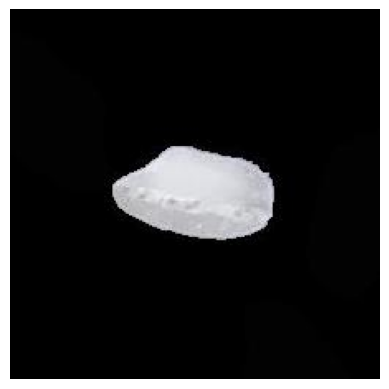

1/1 [==============================] - 0s 28ms/step
Prediction: arborio


In [12]:
 # memanggil fungsi
predict_art()